In [1]:
import utils
import matplotlib.pyplot as plt
import torch

from Holistic_CAM import HolisticCAM

In [2]:
visualizing_workType = 'Seismic' # 'GBR' or 'Seismic'

In [3]:
# mobilenet
model, BaseCAMs = utils.load_model('mobilenetV2')
feature_module = None
get_bottleneck = True
bottleneck = '9' # 6 or 17 or 18
get_layer = True # set as False once bottleneck = '18'
layer = 'conv'
get_conv = True  
conv = '0'

device: cuda


In [4]:
# resnet
model, BaseCAMs = utils.load_model('resnet50')
feature_module = model.layer4
get_bottleneck = False
bottleneck = '2'
get_conv = False 
conv = '0'
get_layer = None
layer = None

device: cuda


In [5]:
file = 'tricycle.png'

In [6]:
input_tensor, img_show = utils.read_img('pic/'+file)

In [7]:
out_vector = model(input_tensor)
first_class = int(torch.argmax(out_vector, dim=1))

In [8]:
classOfInterest = first_class

In [9]:
classOfInterest

870

In [10]:
multiScaleCAM = BaseCAMs.MultiScalBaseCAM(model, feature_module=feature_module,get_bottleneck=get_bottleneck, target_bottleneck=bottleneck,get_layer=get_layer,target_layer=layer, get_conv=get_conv, target_conv=conv)
logit = multiScaleCAM.run(input_tensor, classOfInterest)

if mobilenet rise UnboundLocalError: local variable 'forwardHandle' referenced before assignment set get_layer=False if bottleneck='18'

In [11]:
holisticCAM = HolisticCAM(multiScaleCAM)
mask = holisticCAM.holistic_CAM(classOfInterest, True, True)

Text(0.5, 1.0, 'Holistic-CAM')

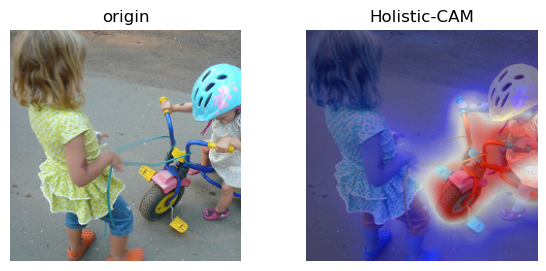

In [12]:
outImg = utils.visualizing_CAM(img_show, mask, visualizing_workType)
plt.figure(figsize=(7, 3)) 
plt.subplot(1, 2, 1)  
plt.imshow(img_show)
plt.axis('off') 
plt.title('origin')
plt.subplot(1, 2, 2) 
plt.imshow(outImg)
plt.axis('off') 
plt.title('Holistic-CAM')